In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
test = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')
train = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
sample_sub = pd.read_csv('/kaggle/input/playground-series-s5e3/sample_submission.csv')

In [6]:
print(train.head(5))
print(sample_sub.head(5))

   id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0  
     id  rainfall
0  2190         0
1  2191         0
2  2192         0
3  2193         0
4  2194         0


In [23]:
train.describe()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
count,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000,2190.000000
mean,1094.500000,179.948402,1013.602146,26.365799,23.953059,22.170091,20.454566,82.036530,75.721918,3.744429,104.863151,21.804703,0.753425
std,632.342866,105.203592,5.655366,5.654330,5.222410,5.059120,5.288406,7.800654,18.026498,3.626327,80.002416,9.898659,0.431116
min,0.000000,1.000000,999.000000,10.400000,7.400000,4.000000,-0.300000,39.000000,2.000000,0.000000,10.000000,4.400000,0.000000
25%,547.250000,89.000000,1008.600000,21.300000,19.300000,17.700000,16.800000,77.000000,69.000000,0.400000,40.000000,14.125000,1.000000
50%,1094.500000,178.500000,1013.000000,27.800000,25.500000,23.850000,22.150000,82.000000,83.000000,2.400000,70.000000,20.500000,1.000000
75%,1641.750000,270.000000,1017.775000,31.200000,28.400000,26.400000,25.000000,88.000000,88.000000,6.800000,200.000000,27.900000,1.000000
max,2189.000000,365.000000,1034.600000,36.000000,31.500000,29.800000,26.700000,98.000000,100.000000,12.100000,300.000000,59.500000,1.000000


In [8]:
train.shape

(2190, 13)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

train.corr().style.background_gradient(cmap='coolwarm')

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,1.000000,0.153065,-0.008235,0.012590,0.014307,0.018708,0.006797,-0.029042,0.002226,-0.003022,-0.004223,0.020167,0.033674
day,0.153065,1.000000,0.005337,0.146294,0.153590,0.161475,0.137929,-0.074048,-0.048175,0.060936,0.024800,-0.000199,-0.000462
pressure,-0.008235,0.005337,1.000000,-0.800499,-0.816531,-0.814453,-0.817008,-0.119949,0.098600,-0.257163,-0.643293,0.266012,-0.049886
maxtemp,0.012590,0.146294,-0.800499,1.000000,0.982932,0.965529,0.906703,-0.072615,-0.289047,0.452387,0.662235,-0.354168,-0.079304
temparature,0.014307,0.153590,-0.816531,0.982932,1.000000,0.987150,0.933617,-0.025016,-0.249355,0.414019,0.668963,-0.342262,-0.049660
mintemp,0.018708,0.161475,-0.814453,0.965529,0.987150,1.000000,0.941342,0.009891,-0.219399,0.379497,0.663828,-0.328871,-0.026841
dewpoint,0.006797,0.137929,-0.817008,0.906703,0.933617,0.941342,1.000000,0.153390,-0.088446,0.249676,0.643073,-0.312179,0.081965
humidity,-0.029042,-0.074048,-0.119949,-0.072615,-0.025016,0.009891,0.153390,1.000000,0.584854,-0.541592,-0.012430,0.062285,0.454213
cloud,0.002226,-0.048175,0.098600,-0.289047,-0.249355,-0.219399,-0.088446,0.584854,1.000000,-0.805128,-0.127087,0.184698,0.641191
sunshine,-0.003022,0.060936,-0.257163,0.452387,0.414019,0.379497,0.249676,-0.541592,-0.805128,1.000000,0.272235,-0.241752,-0.555287


## Можно наблюдать, что в данных не сбалансированные классы

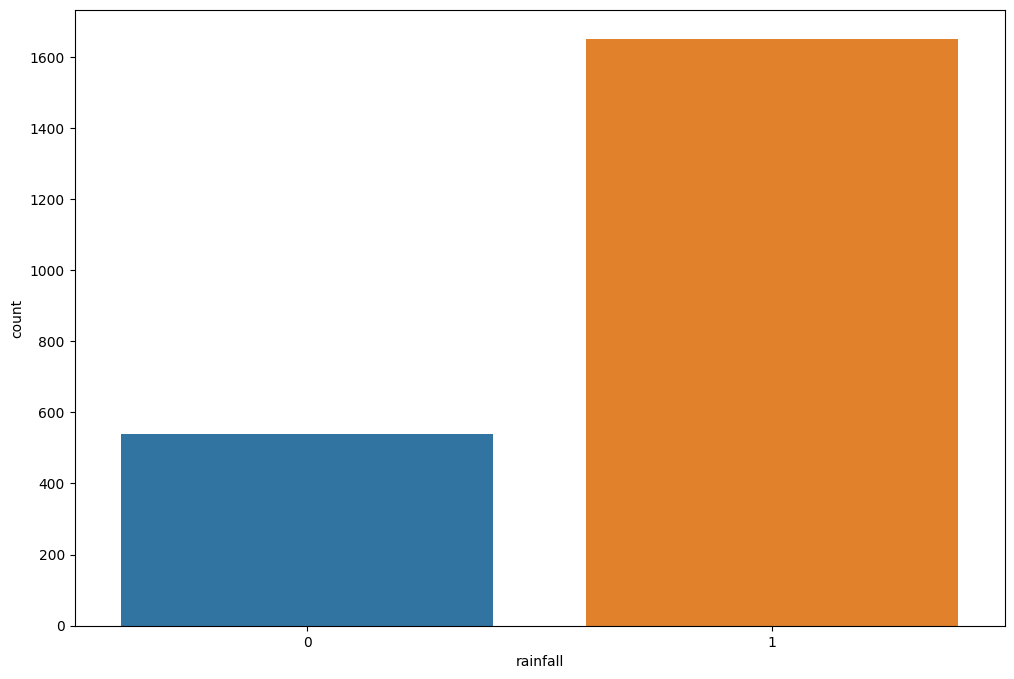

In [27]:
plt.figure(figsize=(12, 8))
sns.countplot(x=train['rainfall'])
plt.show()

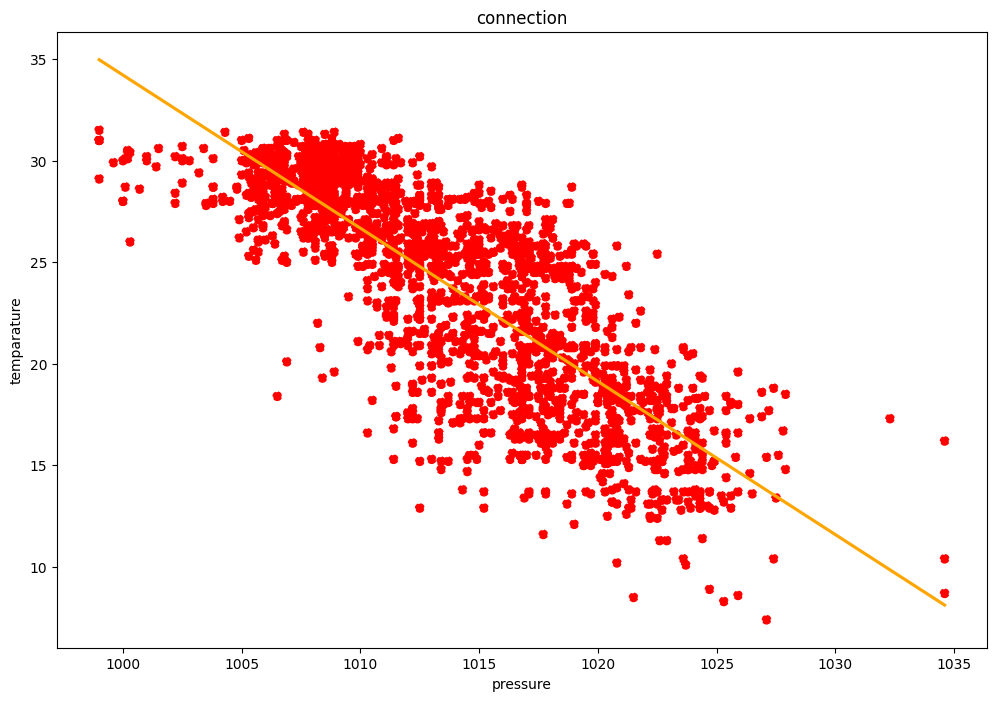

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(train['pressure'], train['temparature'], linestyle='--', color='red')
sns.regplot(x=train['pressure'], y=train['temparature'], ci=None,color='orange', scatter=False)
plt.title('connection')
plt.show()

,id,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2
1,1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9
2,2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1
3,3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6
4,4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8
...,...,...,...,...,...,...,...,...,...,...,...,...
2185,2185,361,1014.6,23.2,20.6,19.1,19.9,97.0,88.0,0.1,40.0,22.1
2186,2186,362,1012.4,17.2,17.3,16.3,15.3,91.0,88.0,0.0,50.0,35.3
2187,2187,363,1013.3,19.0,16.3,14.3,12.6,79.0,79.0,5.0,40.0,32.9
2188,2188,364,1022.3,16.4,15.2,13.8,14.7,92.0,93.0,0.1,40.0,18.0


In [52]:
train['rainfall']

(2190,)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = train.iloc[:, :-1]
y = train['rainfall']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

X_val = test


model = LogisticRegression(penalty='l1', random_state=42, class_weight='balanced', solver='liblinear')
model.fit(X_train, y_train)


y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

roc_met = roc_auc_score(y_test, y_pred_proba)

print(f'ROC_AUC : {roc_met : .2f}')

ROC_AUC :  0.88


In [67]:
X_val.iloc[517, :]

id                                                            2707
day                                                            153
pressure                                                    1007.8
maxtemp                                                       32.9
temparature                                                   30.6
mintemp                                                       28.9
dewpoint                                                      22.0
humidity                                                      65.0
cloud                                                         75.0
sunshine                                                       8.2
winddirection    <bound method Series.median of 0      50.0\n1 ...
windspeed                                                     17.2
Name: 517, dtype: object

In [69]:
X_val['winddirection'].unique()

array([50.0, 40.0, 20.0, 70.0, 10.0, 60.0, 30.0, 80.0, 210.0, 200.0,
       220.0, 230.0, 300.0, 140.0, 190.0, 180.0, 120.0, 270.0, 250.0,
       240.0, 260.0, 160.0, 130.0, 110.0, 100.0, 90.0,
       <bound method Series.median of 0      50.0
       1      50.0
       2      40.0
       3      20.0
       4      20.0
              ...
       725    20.0
       726    40.0
       727    50.0
       728    50.0
       729    60.0
       Name: winddirection, Length: 730, dtype: object>, 290.0, 280.0,
       170.0], dtype=object)

In [79]:
X_val['winddirection'] = pd.to_numeric(X_val['winddirection'], errors='coerce')
X_val['winddirection'] = X_val['winddirection'].interpolate()
X_val['winddirection'].fillna(X_val['winddirection'].median(), inplace=True)
print(X_val['winddirection'].isnull().sum())  # Должно быть 0

0


<ipython-input-79-37967be6e72a>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_val['winddirection'].fillna(X_val['winddirection'].median(), inplace=True)


In [59]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             730 non-null    int64  
 1   day            730 non-null    int64  
 2   pressure       730 non-null    float64
 3   maxtemp        730 non-null    float64
 4   temparature    730 non-null    float64
 5   mintemp        730 non-null    float64
 6   dewpoint       730 non-null    float64
 7   humidity       730 non-null    float64
 8   cloud          730 non-null    float64
 9   sunshine       730 non-null    float64
 10  winddirection  729 non-null    float64
 11  windspeed      730 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 68.6 KB


In [ ]:
X_val.info()

In [80]:
X_val['rainfall'] = model.predict(X_val)
X_val.to_csv('result.csv', columns=['id', 'rainfall'], index=False)
